In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load & Prepare Data

In [4]:
# Load dataset
df = pd.read_csv("train.csv")   # Titanic dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Handle missing values


In [6]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Convert all column names to lowercase (SAFE STEP)
df.columns = df.columns.str.lower()

print("Columns after standardizing:", df.columns)


Columns after standardizing: Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [8]:
# Handle Missing Values

In [9]:

if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df = df.drop(columns=['cabin','deck'], errors='ignore')


In [10]:
# Feature Engineering

In [11]:
if 'sibsp' in df.columns and 'parch' in df.columns:
    df['family_size'] = df['sibsp'] + df['parch'] + 1
# Drop unnecessary columns if exist
df = df.drop(columns=['alive','who','adult_male','embark_town','name','ticket','passengerid'], errors='ignore')

# Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)

# Define X and y safely
if 'survived' in df.columns:
    X = df.drop('survived', axis=1)
    y = df['survived']
elif 'survived' not in df.columns and 'Survived' in df.columns:
    X = df.drop('Survived', axis=1)
    y = df['Survived']


In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest (Best for marks)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8212290502793296
Confusion Matrix:
 [[90 15]
 [17 57]]


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

In [13]:
# MODEL 1: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


In [16]:
# MODEL 2: Decision Tree

In [17]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("Improved Decision Tree Accuracy:", dt_acc)

Improved Decision Tree Accuracy: 0.7988826815642458


In [ ]:
# MODEL 3: Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8212290502793296


In [ ]:
#  Compare Model Performance

In [27]:
import pandas as pd

results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest'
    ],
    'Accuracy': [
        log_acc,
        dt_acc,
        rf_acc
    ]
})

results = results.sort_values(by='Accuracy', ascending=False)

print(results)

                 Model  Accuracy
2        Random Forest  0.821229
0  Logistic Regression  0.810056
1        Decision Tree  0.787709


In [ ]:
# Random Forest

In [28]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
6,sex_male,0.272180
4,fare,0.263036
1,age,0.244985
0,pclass,0.081521
5,family_size,0.055278
2,sibsp,0.030547
8,embarked_S,0.021859
3,parch,0.021729
7,embarked_Q,0.008865


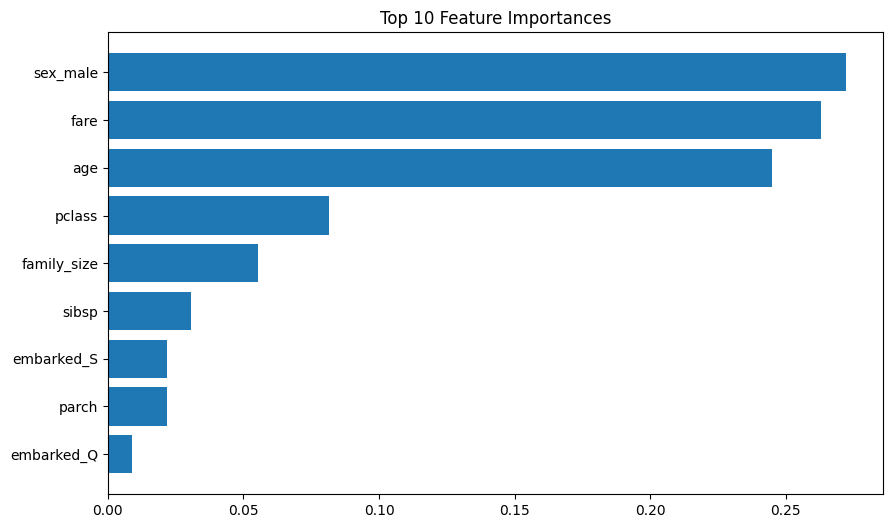

In [29]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], 
         feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()

In [30]:
# BONUS: Hyperparameter Tuning (GridSearchCV)

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [33]:
# Evaluate Tuned Model

In [34]:
best_rf = grid_search.best_estimator_

tuned_pred = best_rf.predict(X_test)

tuned_acc = accuracy_score(y_test, tuned_pred)

print("Random Forest Accuracy BEFORE tuning:", rf_acc)
print("Random Forest Accuracy AFTER tuning:", tuned_acc)

Random Forest Accuracy BEFORE tuning: 0.8212290502793296
Random Forest Accuracy AFTER tuning: 0.8044692737430168


In [35]:
# Compare Before vs After Tuning

In [36]:
comparison = pd.DataFrame({
    'Model': ['Random Forest (Before)', 'Random Forest (After)'],
    'Accuracy': [rf_acc, tuned_acc]
})

comparison

,Model,Accuracy
0,Random Forest (Before),0.821229
1,Random Forest (After),0.804469


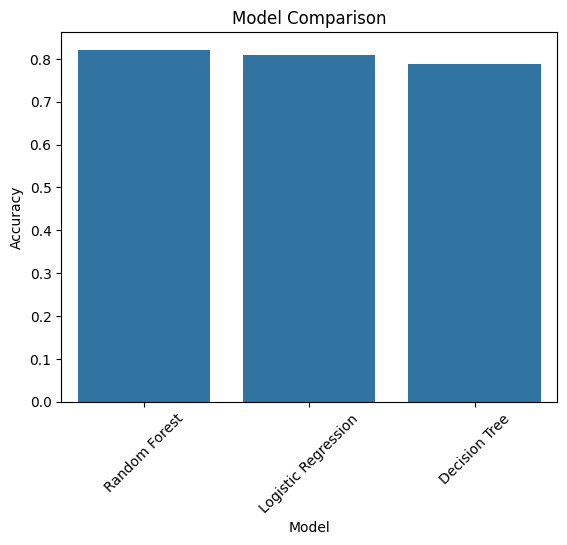

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='Accuracy', data=results)
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()